In [45]:
import os, cv2, keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [46]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [47]:
model = tf.keras.models.model_from_json(open('model.json').read())
model.load_weights('model.h5')

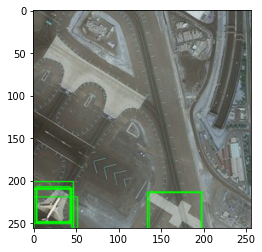

In [48]:
filename = "428501.jpg"
results_list = []
orig_img = cv2.imread(filename)
ss.setBaseImage(orig_img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = orig_img.copy()

img_for_predict = cv2.imread(filename)
ss.setBaseImage(img_for_predict)
ss.switchToSelectiveSearchFast()
_ssresults = ss.process()

for e,result in enumerate(_ssresults):
    if e < 10000:
        x,y,w,h = result
        timage = img_for_predict[y: y + h,x: x + w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis = 0)
        out = model.predict(img)
        if out[0][0] > 0.65:
            cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
            results_list.append({"prob": out[0][0], "x": x, "y": y, "w": w, "h": h})
plt.figure()
plt.imshow(imout)

In [49]:
print(len(results_list))
sorted_list = sorted(results_list, key=lambda k: k['prob']) 
for res in sorted_list:
    print("Prob: {} X: {} Y: {} W: {} H: {}".format(res['prob'], res['x'], res['y'], res['w'], res['h']))

10
Prob: 0.6855506896972656 X: 134 Y: 213 W: 64 H: 43
Prob: 0.6860612630844116 X: 136 Y: 214 W: 61 H: 42
Prob: 0.6953223347663879 X: 4 Y: 209 W: 40 H: 39
Prob: 0.6983625292778015 X: 4 Y: 209 W: 40 H: 41
Prob: 0.7431764006614685 X: 3 Y: 207 W: 40 H: 42
Prob: 0.8067572116851807 X: 0 Y: 209 W: 44 H: 41
Prob: 0.8097413182258606 X: 0 Y: 219 W: 52 H: 37
Prob: 0.8441951274871826 X: 0 Y: 210 W: 45 H: 46
Prob: 0.8878298401832581 X: 0 Y: 201 W: 47 H: 55
Prob: 0.8915244936943054 X: 0 Y: 209 W: 47 H: 47
